#  Lab 4 - Cleaning and EDA of IMDB

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Movies </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Objectives

About 10000 "best movies" were fetched and parsed from IMDB. 

`imdb_top_10000.txt` contain data tabular format as a CSV file. In this lab we'll clean and further parse the data. We'll then do some exploratory data analysis to answer questions about these best books and popular genres.

By the end of this lab, you should be able to:

1. Load and systematically address missing values, ancoded as NaN values in our data set, for example, by removing observations associated with these values.

2. Parse columns in the dataframe to create new dataframe columns.
3. Create and interpret visualizations to explore the data set


### Basic EDA workflow


The basic workflow is as follows:

1. **Scrape**  data using beautiful soup and python request.
2. **Build** a DataFrame from the data (ideally, put all data in this object)
3. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
4. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
5. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## 1. Loading and Cleaning with Pandas
Read in the `imdb_top_10000.txt` file, examine the data, and do any necessary data cleaning.
The textfile is tab-separated, and doesn't have any column headers. We set the appropriate keywords in `pd.read_csv` to handle this

Here is a description of the columns (in order) present in this csv file:

```
imdbID: identifier for the IMDB
title: title of the movie
year: the year the movie was released.
score: Rating of the movie in the scale of 1 - 10
votes: Number of votes received for the movie
runtime: Duration of the movie in min
genres: Genre of the movie seperated by '|'
```

In [30]:
#reading txt file
import pandas as pd
df = pd.read_csv("imdb_top_10000.txt", sep = '\t',names = ['imdbID','title','year','score','votes','runtime','genres'])
df.head()


imdbID                            title  year  score   votes    runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479  142 mins.   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065  154 mins.   
2  tt0137523                Fight Club (1999)  1999    8.8  458173  139 mins.   
3  tt0133093                The Matrix (1999)  1999    8.7  448114  136 mins.   
4  tt1375666                 Inception (2010)  2010    8.9  385149  148 mins.   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [31]:
#Start by check the column data types
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

In [32]:
#we need to check for NaN values, empty strings...these kid of checks are kown as sanity checks.
df.isna().sum()


imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     1
dtype: int64

In [33]:
df[df.genres.isna()]
df.shape

(10000, 7)

In [34]:

df.dropna(subset = ['genres'],inplace = True)
df.shape

(9999, 7)

In [35]:
# .Insert your code
#######
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

## 2. Asking Questions

Which movie has higest score?

## 3. Parsing and Completing the DataFrame

There are several problems with the DataFrame at this point:

- The runtime column describes a number, but is stored as a string
- The genres column is not atomic -- it aggregates several genres together. This makes it hard, for example, to extract which movies are Comedies.
- The movie year is repeated in the title and year column

In [36]:
#how to remove string from the runtime 
def get_runtime(time):
  time1 = time.replace('mins.', '')
  return time1
df['runtime'] = df.runtime.map(get_runtime)
df.head()



imdbID                            title  year  score   votes runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479    142    
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065    154    
2  tt0137523                Fight Club (1999)  1999    8.8  458173    139    
3  tt0133093                The Matrix (1999)  1999    8.7  448114    136    
4  tt1375666                 Inception (2010)  2010    8.9  385149    148    

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [37]:
#changind the data type of runtime
df['runtime'] = df['runtime'].astype('int')
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime      int64
genres      object
dtype: object

Removing year from the title column 

In [38]:
title1 = df.title[0]
title1

'The Shawshank Redemption (1994)'

In [39]:
#now it's removed
title = title1.split("(")[0]
title

'The Shawshank Redemption '

In [40]:
#applying for all 
def get_title(title1):
  title = title1.split("(")[0]
  return title

df['title'] = df.title.map(get_title)
df.head()


imdbID                      title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption   1994    9.2  619479      142   
1  tt0110912              Pulp Fiction   1994    9.0  490065      154   
2  tt0137523                Fight Club   1999    8.8  458173      139   
3  tt0133093                The Matrix   1999    8.7  448114      136   
4  tt1375666                 Inception   2010    8.9  385149      148   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [41]:
#creating set
genre_set = set()
for genre in df.genres:
  genre_set.update(genre.split('|'))

In [42]:
#size of the genre_set
len(genre_set)


24

In [43]:
#adding 24 column in set
#for genre in genre_set:
 # for row in df.genres:
    #df[genre] = genre in row.split("|")
for genre in genre_set:
  df[genre] = [genre in row.split("|") for row in df.genres]

In [44]:
df.head()

imdbID                      title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption   1994    9.2  619479      142   
1  tt0110912              Pulp Fiction   1994    9.0  490065      154   
2  tt0137523                Fight Club   1999    8.8  458173      139   
3  tt0133093                The Matrix   1999    8.7  448114      136   
4  tt1375666                 Inception   2010    8.9  385149      148   

                             genres    War  Reality-TV  Drama  ...  Thriller  \
0                       Crime|Drama  False       False   True  ...     False   
1                    Crime|Thriller  False       False  False  ...      True   
2            Drama|Mystery|Thriller  False       False   True  ...      True   
3           Action|Adventure|Sci-Fi  False       False  False  ...     False   
4  Action|Adventure|Sci-Fi|Thriller  False       False  False  ...      True   

   Fantasy  Animation  Comedy  Mystery  Sport  Biography  Romance  Family  \
0    False      False   False    False  False      False    False   False   
1    False      False   False    False  False      False    False   False   
2    False      False   False     True  False      False    False   False   
3    False      False   False    False  False      False    False   False   
4    False      False   False    False  False      False    False   False   

   Musical  
0    False  
1    False  
2    False  
3    False  
4    False  

[5 rows x 31 columns]

## 4. EDA

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline


In [46]:
newdf = df[['title','score','votes']]
newdf

title  score   votes
0     The Shawshank Redemption     9.2  619479
1                 Pulp Fiction     9.0  490065
2                   Fight Club     8.8  458173
3                   The Matrix     8.7  448114
4                    Inception     8.9  385149
...                         ...    ...     ...
9995                   Meduzot     7.0    1357
9996            Daltry Calhoun     5.2    1357
9997    The Quiller Memorandum     6.5    1356
9998                      Taal     6.5    1356
9999            The Navigators     6.9    1356

[9999 rows x 3 columns]

In [47]:
minscore=newdf['score'].min()
print("The minimum score is", minscore)
maxscore = newdf['score'].max()
print("The maximum score is", maxscore)

The minimum score is 1.5
The maximum score is 9.2


In [48]:
yeardf = df.groupby("year")
df1999 = yeardf.get_group(2000)

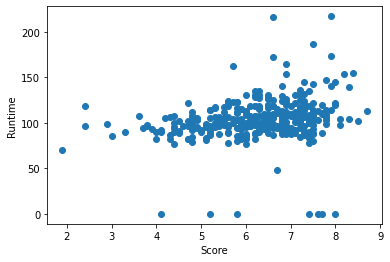

In [49]:
x = df1999.score
y = df1999.runtime

plt.scatter(x,y)
plt.xlabel('Score')
plt.ylabel('Runtime')
plt.show()

In [50]:
year99 = yeardf[['score','runtime']].mean()[:10]

<function matplotlib.pyplot.show>

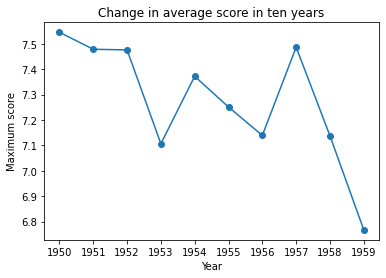

In [51]:
plt.plot(year99.index,year99.score,marker='o')
plt.xticks(year99.index)
plt.title('Change in average score in ten years')
plt.xlabel("Year")
plt.ylabel("Maximum score")
plt.show

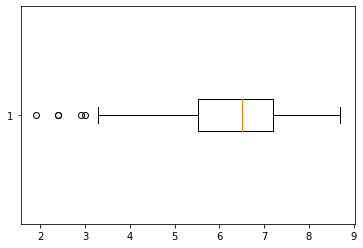

In [28]:
plt.boxplot(df1999.score,vert=False)
plt.show()

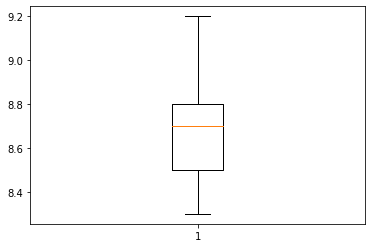

In [52]:
year20 = yeardf[['score','runtime']].max()[-20:]
plt.boxplot(year20.score)
plt.show()

## 5. Determining Best Movies

In [58]:
ndf= df.groupby("year")
ndf



In [59]:
len(ndf)

62

In [60]:
year_check = df.groupby("year", sort=False)
year_check

In [61]:
# finding for minimum score from the dataframe
for key, valuedf in year_check:
    highest_score = valuedf[valuedf['score'] == valuedf.score.max()]
    print(highest_score.title,highest_score.year,highest_score.score)
    break

0    The Shawshank Redemption 
Name: title, dtype: object 0    1994
Name: year, dtype: int64 0    9.2
Name: score, dtype: float64


## 6. Trends in Popularity of Genres

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
genredf = df[list(genre_set)]
genredf.head()

War  Reality-TV  Drama  Music  Horror   News  Western  Sci-Fi  Crime  \
0  False       False   True  False   False  False    False   False   True   
1  False       False  False  False   False  False    False   False   True   
2  False       False   True  False   False  False    False   False  False   
3  False       False  False  False   False  False    False    True  False   
4  False       False  False  False   False  False    False    True  False   

   Film-Noir  ...  Thriller  Fantasy  Animation  Comedy  Mystery  Sport  \
0      False  ...     False    False      False   False    False  False   
1      False  ...      True    False      False   False    False  False   
2      False  ...      True    False      False   False     True  False   
3      False  ...     False    False      False   False    False  False   
4      False  ...      True    False      False   False    False  False   

   Biography  Romance  Family  Musical  
0      False    False   False    False  
1      False    False   False    False  
2      False    False   False    False  
3      False    False   False    False  
4      False    False   False    False  

[5 rows x 24 columns]

In [55]:
genre_result = genredf.sum()
y = genre_result.sort_values(ascending = False)[:10]
x = y.index

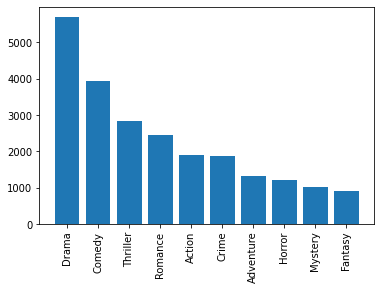

In [56]:
plt.bar(x,y)
plt.xticks(rotation= 90)
plt.show()


From 24 genres Drama is the most popular 